In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, datetime, statsmodels.formula.api as smf, matplotlib.dates as mdates
%matplotlib inline
plt.style.use('ggplot')

In [2]:
def convertDate(d):
    dt = datetime.datetime.strptime(d, '%m/%d/%Y')
    if dt.month<7:
        dt = dt.replace(day=1, month=1)
    elif dt.month>7:
        dt = dt.replace(day=1, month=7)
    else:
        dt = dt.replace(day=1)
    return dt

df = pd.read_csv('data/NYPD_Motor_Vehicle_Collisions.csv', converters={'DATE': convertDate})

In [3]:
df.columns

Index([u'DATE', u'TIME', u'BOROUGH', u'ZIP CODE', u'LATITUDE', u'LONGITUDE',
       u'LOCATION', u'ON STREET NAME', u'CROSS STREET NAME',
       u'OFF STREET NAME', u'NUMBER OF PERSONS INJURED',
       u'NUMBER OF PERSONS KILLED', u'NUMBER OF PEDESTRIANS INJURED',
       u'NUMBER OF PEDESTRIANS KILLED', u'NUMBER OF CYCLIST INJURED',
       u'NUMBER OF CYCLIST KILLED', u'NUMBER OF MOTORIST INJURED',
       u'NUMBER OF MOTORIST KILLED', u'CONTRIBUTING FACTOR VEHICLE 1',
       u'CONTRIBUTING FACTOR VEHICLE 2', u'CONTRIBUTING FACTOR VEHICLE 3',
       u'CONTRIBUTING FACTOR VEHICLE 4', u'CONTRIBUTING FACTOR VEHICLE 5',
       u'UNIQUE KEY', u'VEHICLE TYPE CODE 1', u'VEHICLE TYPE CODE 2',
       u'VEHICLE TYPE CODE 3', u'VEHICLE TYPE CODE 4', u'VEHICLE TYPE CODE 5'],
      dtype='object')

In [4]:
c_inj_agg = df.groupby('DATE').sum()['NUMBER OF CYCLIST INJURED']
c_k_agg = df.groupby('DATE').sum()['NUMBER OF CYCLIST KILLED']

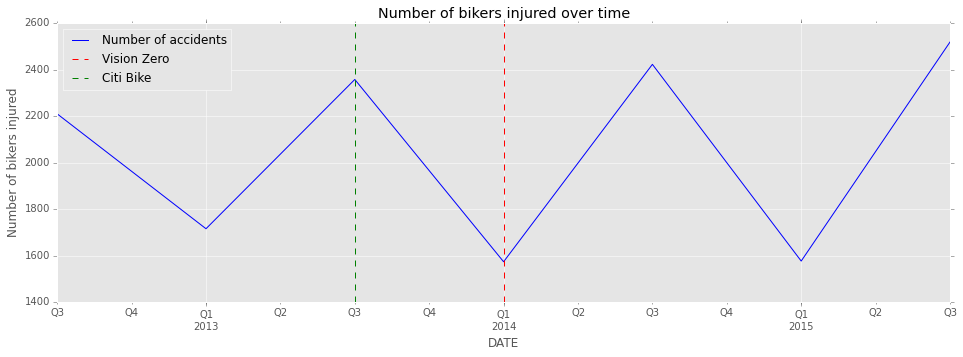

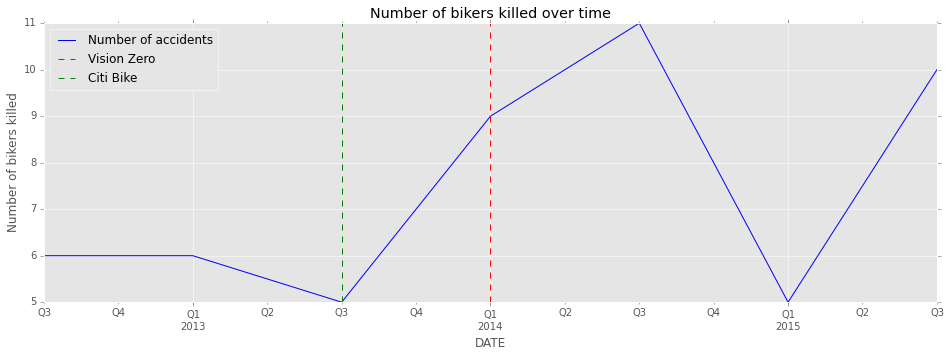

In [5]:
plt.figure(figsize=(16,5))
c_inj_agg.plot(color='b', label='Number of accidents')
plt.axvline(c_inj_agg.index[3], linestyle='--', color='r', label='Vision Zero')
plt.axvline(c_inj_agg.index[2], linestyle='--', color='g', label='Citi Bike')
plt.ylabel('Number of bikers injured')
plt.title('Number of bikers injured over time')
plt.legend(loc=2)
plt.figure(figsize=(16,5))
c_k_agg.plot(color='b', label='Number of accidents')
plt.axvline(c_k_agg.index[3], linestyle='--', color='r', label='Vision Zero')
plt.axvline(c_k_agg.index[2], linestyle='--', color='g', label='Citi Bike')
plt.ylabel('Number of bikers killed')
plt.title('Number of bikers killed over time')
plt.legend(loc=2)

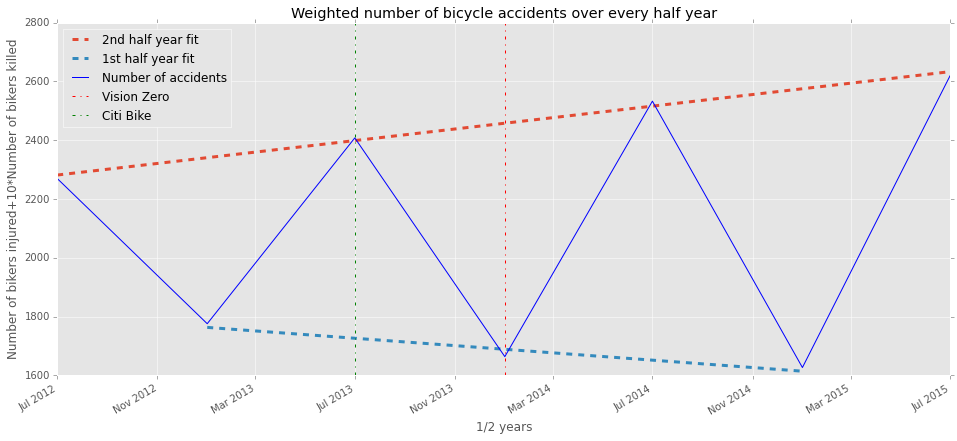

In [8]:
c_sev = c_inj_agg + 10*c_k_agg
plt.figure(figsize=(16,7))
idx = [c_sev.index[i] for i in range(0,len(c_sev),2)]
y = [c_sev[i] for i in range(0,len(c_sev),2)]
x = np.arange(len(y))
mod = smf.ols(formula='y ~ x', data = {'x': x, 'y': y}).fit()
fit = mod.params[0] + x*mod.params[1]
plt.plot(idx, fit, linestyle='--', lw=3, label='2nd half year fit')
idx1 = [c_sev.index[i] for i in range(1,len(c_sev),2)]
y1 = [c_sev[i] for i in range(1,len(c_sev),2)]
x1 = np.arange(len(y1))
mod1 = smf.ols(formula='y1 ~ x1', data = {'x1': x1, 'y1': y1}).fit()
fit1 = mod1.params[0] + x1*mod1.params[1]
plt.plot(idx1, fit1, linestyle='--', lw=3, label='1st half year fit')
c_sev.plot(color='b', label='Number of accidents')
plt.axvline(c_sev.index[3], linestyle='-.', color='r', label='Vision Zero')
plt.axvline(c_sev.index[2], linestyle='-.', color='g', label='Citi Bike')
plt.xlabel('1/2 years')
plt.ylabel('Number of bikers injured+10*Number of bikers killed')
plt.title('Weighted number of bicycle accidents over every half year')
plt.legend(loc=0)